# 5.2


In [158]:
import numpy as np
import scipy.stats as st
import scipy.integrate as si
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Markdown, Latex

%matplotlib inline

In [18]:
from sklearn.datasets import load_iris
data = load_iris()

setosa = data.data[:50]
versicolor = data.data[50:100]
virginica = data.data[100:]

Оценим параметры распределения $N(a, \Sigma)$ для каждой смеси.

In [30]:
def a_func(flower):
    a = np.zeros(4)
    for array in flower:
        for i in range(4):
            a[i] += array[i]
    a /= 50
    return a

In [162]:
a_1 = a_func(setosa)
a_2 = a_func(versicolor)
a_3 = a_func(virginica)

In [168]:
display(Latex('$a_1$= '))
print(a_1)
display(Latex('$a_2$='))
print(a_2)
display(Latex('$a_3$='))
print(a_3)

<IPython.core.display.Latex object>

[ 5.006  3.418  1.464  0.244]


<IPython.core.display.Latex object>

[ 5.936  2.77   4.26   1.326]


<IPython.core.display.Latex object>

[ 6.588  2.974  5.552  2.026]


In [53]:
def sigma_func(flower, a):
    sigma = np.zeros(16).reshape(4, 4)
    for i in range(4):
        for j in range(4):
            ave = 0
            for k in range(50):
                ave += flower[k][i] * flower[k][j]
            sigma[i][j] = ave / 50 - a[i] * a[j]
    return sigma

In [156]:
sigma_1 = sigma_func(setosa, a_1)
sigma_2 = sigma_func(versicolor, a_2)
sigma_3 = sigma_func(virginica, a_3)

In [161]:
display(Latex('$\Sigma_1$='))
print(sigma_1)
display(Latex('$\Sigma_2$='))
print(sigma_2)
display(Latex('$\Sigma_3$='))
print(sigma_3)

<IPython.core.display.Latex object>

[[ 0.121764  0.098292  0.015816  0.010336]
 [ 0.098292  0.142276  0.011448  0.011208]
 [ 0.015816  0.011448  0.029504  0.005584]
 [ 0.010336  0.011208  0.005584  0.011264]]


<IPython.core.display.Latex object>

[[ 0.261104  0.08348   0.17924   0.054664]
 [ 0.08348   0.0965    0.081     0.04038 ]
 [ 0.17924   0.081     0.2164    0.07164 ]
 [ 0.054664  0.04038   0.07164   0.038324]]


<IPython.core.display.Latex object>

[[ 0.396256  0.091888  0.297224  0.048112]
 [ 0.091888  0.101924  0.069952  0.046676]
 [ 0.297224  0.069952  0.298496  0.047848]
 [ 0.048112  0.046676  0.047848  0.073924]]


In [180]:
def sigma_ij(sigma, i, j):
    sigma_ij = np.zeros(4).reshape(2, 2)
    sigma_ij[0][0] = sigma[i][i]
    sigma_ij[0][1] = sigma[i][j]
    sigma_ij[1][0] = sigma[j][i]
    sigma_ij[1][1] = sigma[j][j]
    return sigma_ij
    
def density_func(flower, _a, _sigma, i, j):
    a = np.array([_a[i], _a[j]])
    sigma = sigma_ij(_sigma, i, j)
    
    coord_i = np.array([])
    coord_j = np.array([])
    for array in flower:
        coord_i = np.append(coord_i, array[i])
        coord_j = np.append(coord_j, array[j])
    
    grid = np.mgrid[-10:10:0.05, -10:10:0.05]
    density = np.array([[st.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean = a, cov = sigma)
        for i in range(grid[0].shape[0])]
            for j in range(grid[0].shape[1])])

    plt.figure(figsize=(6, 6))
    CS = plt.contourf(grid[1], grid[0], density, cmap = 'Paired')  
    
    plt.scatter(coord_i, coord_j)
    
    plt.xlim((np.min(coord_i) - 0.2, np.max(coord_i) + 0.2))
    plt.ylim((np.min(coord_j) - 0.2, np.max(coord_j) + 0.2))
    
    plt.show()

Построим графики плотностей для компонент (0, 1), (1, 3), (2,3) первой смеси:

(0, 1) :


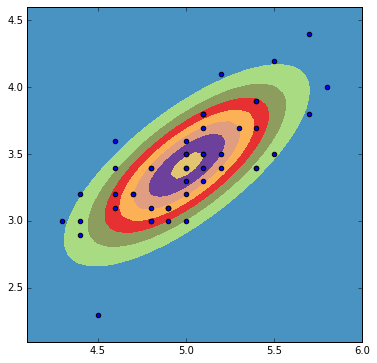

(1, 3) :


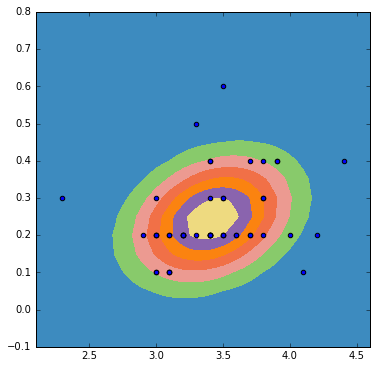

(2, 3) :


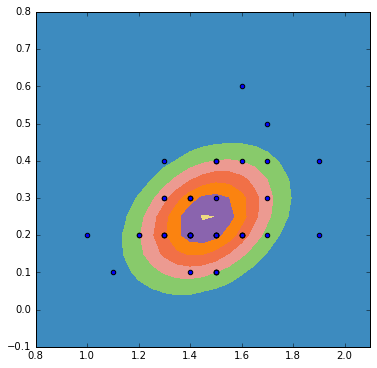

In [181]:
print((0,1),':')
density_func(setosa, a_1, sigma_1, 0, 1)
print((1,3),':')
density_func(setosa, a_1, sigma_1, 1, 3)
print((2,3),':')
density_func(setosa, a_1, sigma_1, 2, 3)

Построим графики плотностей для компонент (0, 1), (1, 3), (2,3) второй смеси:

(0, 1) :


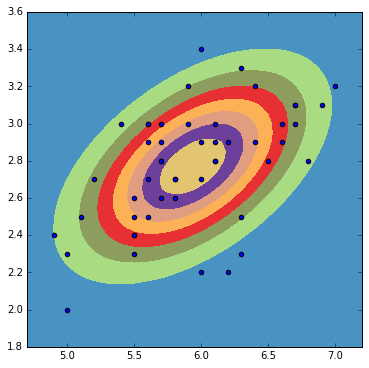

(1, 3) :


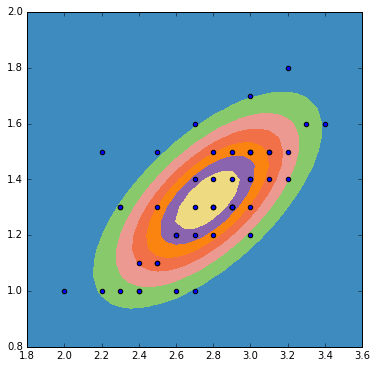

(2, 3) :


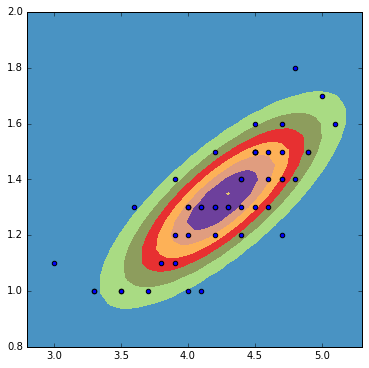

In [182]:
print((0,1),':')
density_func(versicolor, a_2, sigma_2, 0, 1)
print((1,3),':')
density_func(versicolor, a_2, sigma_2, 1, 3)
print((2,3),':')
density_func(versicolor, a_2, sigma_2, 2, 3)

Построим графики плотностей для компонент (0, 1), (1, 3), (2,3) третьей смеси:

(0, 1) :


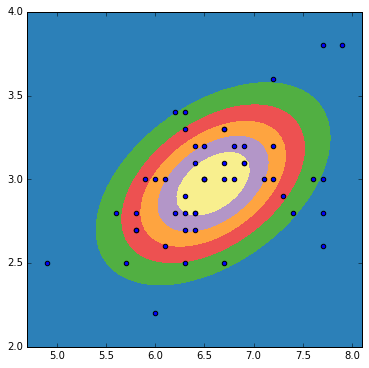

(1, 3) :


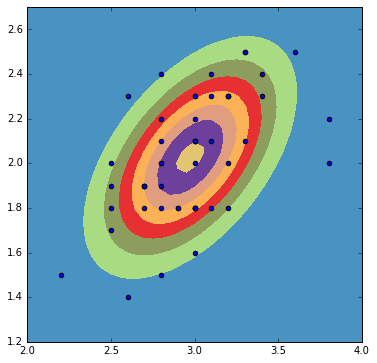

(2, 3) :


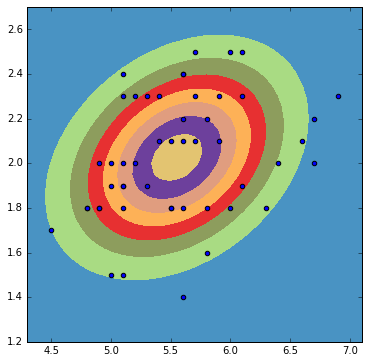

In [183]:
print((0,1),':')
density_func(virginica, a_3, sigma_3, 0, 1)
print((1,3),':')
density_func(virginica, a_3, sigma_3, 1, 3)
print((2,3),':')
density_func(virginica, a_3, sigma_3, 2, 3)

Все компоненты смеси встречаются равновероятно с вероятностью $P(T = k) = \frac{50}{150} = \frac{1}{3}$.

In [227]:
E = [(a_2 + a_3) / 2, (a_1 + a_3) / 2, (a_2 + a_1) / 2]
print(E)

[array([ 6.262,  2.872,  4.906,  1.676]), array([ 5.797,  3.196,  3.508,  1.135]), array([ 5.471,  3.094,  2.862,  0.785])]


Условные мат. ожидания:

$E(X|T \neq 0) = \begin{pmatrix} 6.262 \\  2.872 \\  4.906 \\  1.676 \end{pmatrix}$

$E(X|T \neq 1) = \begin{pmatrix} 5.797 \\  3.196 \\  3.508 \\  1.135 \end{pmatrix}$

$E(X|T \neq 2) = \begin{pmatrix} 5.471 \\ 3.094 \\ 2.862 \\ 0.785 \end{pmatrix}$

Получим новые оценки $a_1', a_2', a_3'$ и $\Sigma_1', \Sigma_2', \Sigma_3'$.

In [229]:
def a_cond(flower1, flower2):
    a = np.zeros(4)
    for array in flower1:
        for i in range(4):
            a[i] += array[i]
    for array in flower2:
        for i in range(4):
            a[i] += array[i]
    a /= 100
    return a

In [230]:
a_cond_1 = a_cond(versicolor, virginica)
a_cond_2 = a_cond(setosa, virginica)
a_cond_3 = a_cond(setosa, versicolor)
display(Latex('$a_1\'$= '))
print(a_cond_1)
display(Latex('$a_2\'$='))
print(a_cond_2)
display(Latex('$a_3\'$='))
print(a_cond_3)

<IPython.core.display.Latex object>

[ 6.262  2.872  4.906  1.676]


<IPython.core.display.Latex object>

[ 5.797  3.196  3.508  1.135]


<IPython.core.display.Latex object>

[ 5.471  3.094  2.862  0.785]


In [231]:
def sigma_cond(flower1, flower2, a):
    sigma = np.zeros(16).reshape(4, 4)
    for i in range(4):
        for j in range(4):
            ave = 0
            for k in range(50):
                ave += flower1[k][i] * flower1[k][j]
            for k in range(50):
                ave += flower2[k][i] * flower2[k][j]
            sigma[i][j] = ave / 100 - a[i] * a[j]
    return sigma

In [232]:
sigma_cond_1 = sigma_cond(versicolor, virginica, a_cond_1)
sigma_cond_2 = sigma_cond(setosa, virginica, a_cond_2)
sigma_cond_3 = sigma_cond(setosa, versicolor, a_cond_3)
display(Latex('$\Sigma_1\'$='))
print(sigma_cond_1)
display(Latex('$\Sigma_2\'$='))
print(sigma_cond_2)
display(Latex('$\Sigma_3\'$='))
print(sigma_cond_3)

<IPython.core.display.Latex object>

[[ 0.434956  0.120936  0.448828  0.165488]
 [ 0.120936  0.109616  0.141368  0.079228]
 [ 0.448828  0.141368  0.674764  0.285844]
 [ 0.165488  0.079228  0.285844  0.178624]]


<IPython.core.display.Latex object>

[[ 0.884691 -0.080512  1.773324  0.734005]
 [-0.080512  0.171384 -0.413068 -0.16886 ]
 [ 1.773324 -0.413068  4.341936  1.84792 ]
 [ 0.734005 -0.16886   1.84792   0.836475]]


<IPython.core.display.Latex object>

[[ 0.407659 -0.059774  0.747598  0.284065]
 [-0.059774  0.224364 -0.406728 -0.14949 ]
 [ 0.747598 -0.406728  2.077356  0.79493 ]
 [ 0.284065 -0.14949   0.79493   0.317475]]


Для пар координат (0, 1), (1, 3) и (2, 3) построим графики условной плотности $p_{(X|I\{T \ne k\})}(x|1)$

In [233]:
def density_cond(flower1, flower2, _a, _sigma, i, j):
    a = np.array([_a[i], _a[j]])
    sigma = sigma_ij(_sigma, i, j)
    
    coord_i = np.array([])
    coord_j = np.array([])
    for array in flower1:
        coord_i = np.append(coord_i, array[i])
        coord_j = np.append(coord_j, array[j])
    for array in flower2:
        coord_i = np.append(coord_i, array[i])
        coord_j = np.append(coord_j, array[j])
    
    grid = np.mgrid[-10:10:0.05, -10:10:0.05]
    density = np.array([[st.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean = a, cov = sigma)
        for i in range(grid[0].shape[0])]
            for j in range(grid[0].shape[1])])

    plt.figure(figsize=(6, 6))
    CS = plt.contourf(grid[1], grid[0], density, cmap = 'Set3')  
    
    plt.xlim((np.min(coord_i) - 0.2, np.max(coord_i) + 0.2))
    plt.ylim((np.min(coord_j) - 0.2, np.max(coord_j) + 0.2))
    
    plt.show()

Для первой смеси:

(0, 1) :


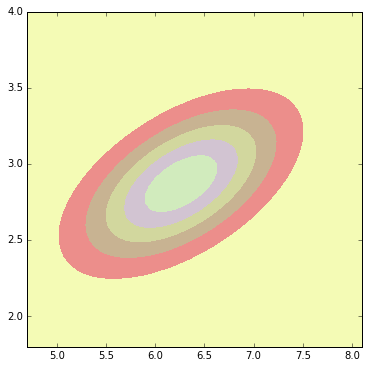

(1, 3) :


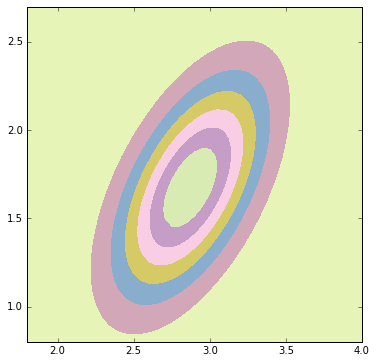

(2, 3) :


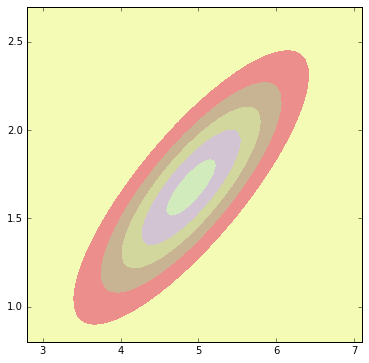

In [234]:
print((0,1),':')
density_cond(versicolor, virginica, a_cond_1, sigma_cond_1, 0, 1)
print((1,3),':')
density_cond(versicolor, virginica, a_cond_1, sigma_cond_1, 1, 3)
print((2,3),':')
density_cond(versicolor, virginica, a_cond_1, sigma_cond_1, 2, 3)

Для второй смеси:

(0, 1) :


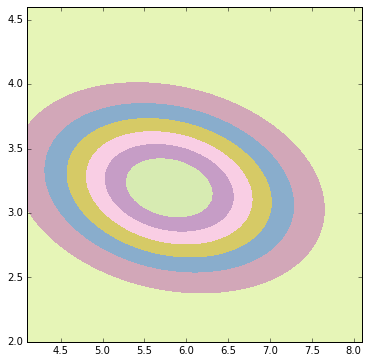

(1, 3) :


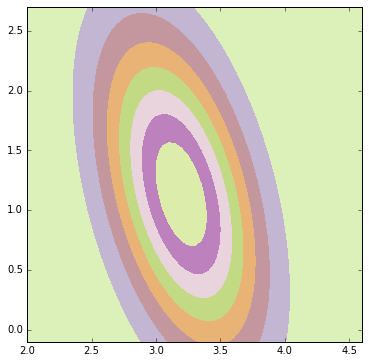

(2, 3) :


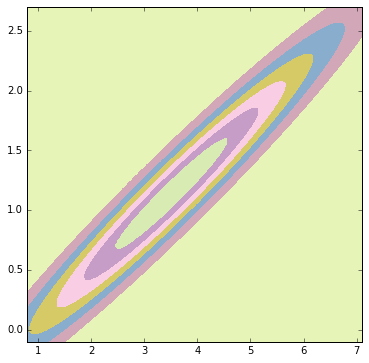

In [235]:
print((0,1),':')
density_cond(setosa, virginica, a_cond_2, sigma_cond_2, 0, 1)
print((1,3),':')
density_cond(setosa, virginica, a_cond_2, sigma_cond_2, 1, 3)
print((2,3),':')
density_cond(setosa, virginica, a_cond_2, sigma_cond_2, 2, 3)

Для третьей смеси:

(0, 1) :


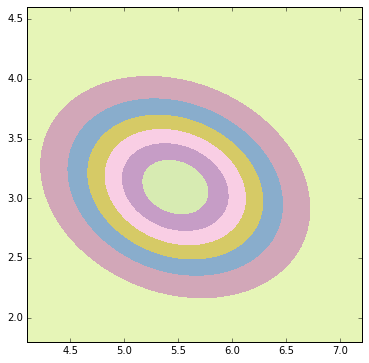

(1, 3) :


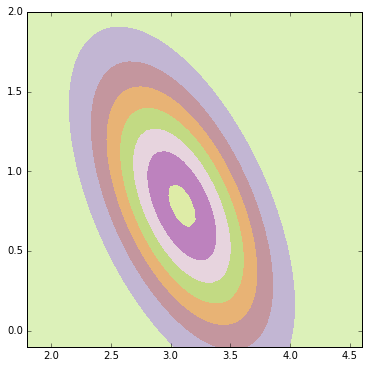

(2, 3) :


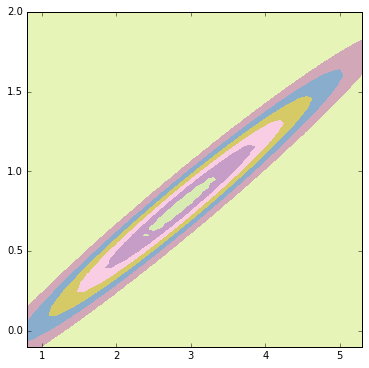

In [236]:
print((0,1),':')
density_cond(setosa, versicolor, a_cond_3, sigma_cond_3, 0, 1)
print((1,3),':')
density_cond(setosa, versicolor, a_cond_3, sigma_cond_3, 1, 3)
print((2,3),':')
density_cond(setosa, versicolor, a_cond_3, sigma_cond_3, 2, 3)

In [300]:
max_array = np.array([])
min_array = np.array([])
for flower in [setosa, versicolor, virginica]:
    for array in flower:
        density_array = np.array([np.array([[st.multivariate_normal.pdf(array, mean = a_cond_1, cov = sigma_cond_1)]]), 
            np.array([[st.multivariate_normal.pdf(array, mean = a_cond_2, cov = sigma_cond_2)]]),
            np.array([[st.multivariate_normal.pdf(array, mean = a_cond_3, cov = sigma_cond_3)]])])
        m = density_array[0]
        k = 0
        for i in range(1, 3):
            if (density_array[i] < m):
                m = density_array[i]
                k = i
        max_array = np.append(max_array, k)
        
mistake = 0
for i in range(len(max_array)):
    if (max_array[i] != data.target[i]):
        mistake += 1
        
print("Ошибка:", mistake / 150)

Ошибка: 0.12


Проклассифицируем все пространство методом $k = argmin(p_{(X|I(T \ne k))}(x |1))$. Доля ошибок - 12 %.

In [280]:
def clas(i, j):
    x = np.array([])
    y = np.array([])
    for array in data.data:
        x = np.append(x, array[i])
        y = np.append(y, array[j])
    plt.figure(figsize=(6, 6))
    for i in range(150):
        if (max_array[i] == 0):
            plt.scatter(x[i], y[i], color='red')
        if (max_array[i] == 1):
            plt.scatter(x[i], y[i], color='green')
        if (max_array[i] == 2):
            plt.scatter(x[i], y[i], color='blue')
    plt.show()

Нарисуем классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3). Красным цветом обозначим точки первой смеси, зеленым - второй и синим - третьей:

(0, 1) :


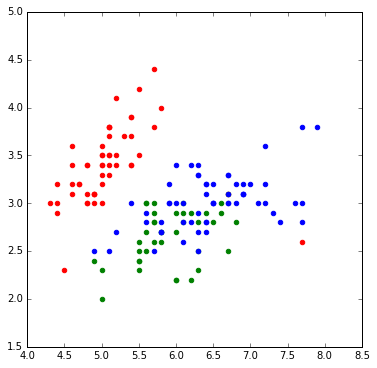

(1, 3) :


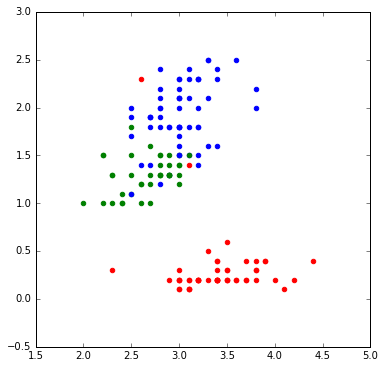

(2, 3) :


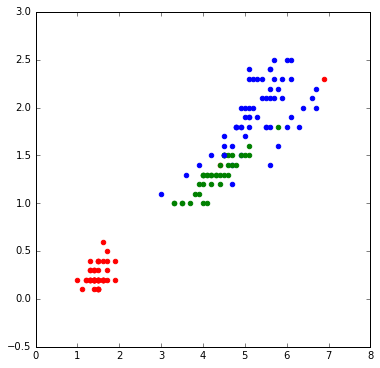

In [281]:
print((0,1),':')
clas(0,1)
print((1,3),':')
clas(1,3)
print((2,3),':')
clas(2,3)